In [41]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os
import sys
#scripts_path = os.path.basename(os.path.abspath(__file__))
#scripts_path = os.path.basename(scripts_path)
#scripts_path = os.path.join(scripts_path, "scripts")
scripts_path = "/home/joao/Documentos/repos/renewable-generation-into-reserve-markets/scripts"
sys.path.append(scripts_path)

from predictions_scores import prediction_score, save_scores

# Read data
dataset = pd.read_csv('../data/dados_2014-2022.csv', index_col=0)
original_dataset = dataset.copy()
datetime_col = "datetime"
d = pd.to_datetime(dataset[datetime_col], format="mixed")
original_dataset[datetime_col] = d
original_dataset = original_dataset.set_index('datetime')

d = pd.to_datetime(dataset["datetime"], format="mixed", utc=True)

dataset.index = d
dataset.drop("datetime", axis=1, inplace=True)
# Impute missing values
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns, index=dataset.index)


/tmp/ipykernel_136147/3916156602.py:25: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  d = pd.to_datetime(dataset[datetime_col], format="mixed")


In [42]:
path_new = "/home/joao/Transferências/BenchmarkUp.xlsx"
new_df = pd.read_excel(path_new)
new_df.index =  dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])].index

In [43]:
for met in ["UpwardUsedSecondaryReserveEnergy", "DownwardUsedSecondaryReserveEnergy",
            "SecondaryReserveAllocationADownward", "SecondaryReserveAllocationAUpward"]:
    print(met)
    print("Soma :", dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])][met].sum())


UpwardUsedSecondaryReserveEnergy
Soma : 4816312.5
DownwardUsedSecondaryReserveEnergy
Soma : 7001742.0
SecondaryReserveAllocationADownward
Soma : 31992700.5
SecondaryReserveAllocationAUpward
Soma : 34848132.5


In [44]:
for met in ["Energia Up", "TSO Up",
            "surplus"]:
    print(met)
    print("Soma :", new_df[met].sum())


Energia Up
Soma : 4817357.199999999
TSO Up
Soma : 21867711.25
surplus
Soma : 17202923.75


In [48]:
 dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])][["UpwardUsedSecondaryReserveEnergy", "DownwardUsedSecondaryReserveEnergy",
            "SecondaryReserveAllocationADownward", "SecondaryReserveAllocationAUpward"]]

,UpwardUsedSecondaryReserveEnergy,DownwardUsedSecondaryReserveEnergy,SecondaryReserveAllocationADownward,SecondaryReserveAllocationAUpward
datetime,,,,
2019-01-01 00:00:00+00:00,116.9,83.7,499.0,597.0
2019-01-01 01:00:00+00:00,348.1,11.6,499.0,599.0
2019-01-01 02:00:00+00:00,286.9,15.3,499.0,598.0
2019-01-01 03:00:00+00:00,398.4,36.6,499.0,599.0
2019-01-01 04:00:00+00:00,280.9,22.4,398.0,500.0
...,...,...,...,...
2022-12-31 18:00:00+00:00,374.4,113.2,3184.0,3188.0
2022-12-31 19:00:00+00:00,816.6,186.4,3176.0,3180.0
2022-12-31 20:00:00+00:00,673.5,35.0,3180.0,3180.0


In [50]:
new_df["TSO Up"].mean()

623.6869331469967

In [51]:
dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])]["SecondaryReserveAllocationAUpward"].mean()

993.9003051736923

<Axes: xlabel='datetime'>

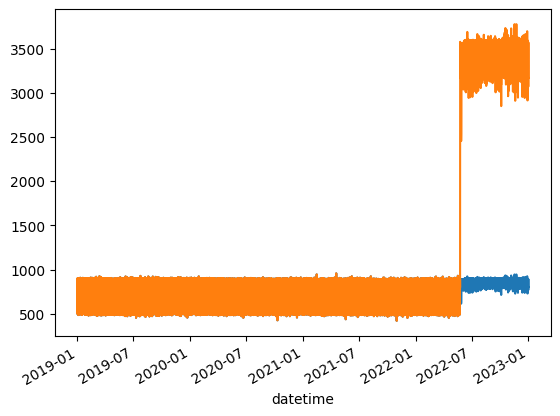

In [49]:
new_df["TSO Up"].plot()
dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])]["SecondaryReserveAllocationAUpward"].plot()

In [46]:
new_df#["Energia Up"]

,Energia Up,TSO Up,surplus,Sum
datetime,,,,
2019-01-01 00:00:00+00:00,116.9,597.0,480.1,17202923.75
2019-01-01 01:00:00+00:00,348.1,599.0,250.9,NaN
2019-01-01 02:00:00+00:00,286.9,598.0,311.1,NaN
2019-01-01 03:00:00+00:00,398.4,599.0,200.6,NaN
2019-01-01 04:00:00+00:00,280.9,500.0,219.1,NaN
...,...,...,...,...
2022-12-31 18:00:00+00:00,816.6,795.0,0.0,NaN
2022-12-31 19:00:00+00:00,673.5,795.0,121.5,NaN
2022-12-31 20:00:00+00:00,344.9,768.0,423.1,NaN


In [34]:
mask_not_true = new_df["Energia Up"] == dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])]["UpwardUsedSecondaryReserveEnergy"]
mask_not_true = ~mask_not_true

<Axes: xlabel='datetime'>

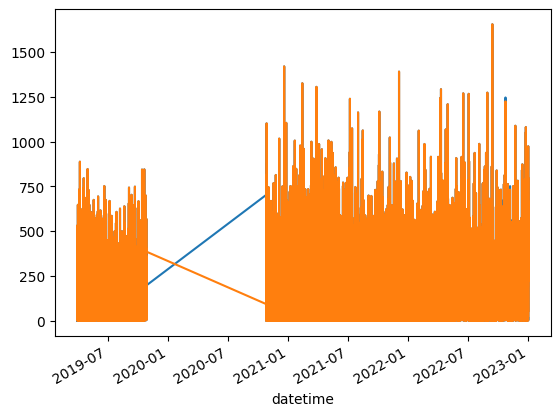

In [35]:
new_df["Energia Up"][mask_not_true].plot()
dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])]["UpwardUsedSecondaryReserveEnergy"][mask_not_true].plot()

In [36]:
new_df["Energia Up"][mask_not_true]

datetime
2019-03-31 01:00:00+00:00      0.0
2019-03-31 02:00:00+00:00    185.1
2019-03-31 03:00:00+00:00     12.9
2019-03-31 04:00:00+00:00    189.6
2019-03-31 05:00:00+00:00    275.6
                             ...  
2022-12-31 18:00:00+00:00    816.6
2022-12-31 19:00:00+00:00    673.5
2022-12-31 20:00:00+00:00    344.9
2022-12-31 21:00:00+00:00      3.9
2022-12-31 22:00:00+00:00     15.9
Name: Energia Up, Length: 23957, dtype: float64

In [38]:
dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])][mask_not_true]

,DownwardUsedSecondaryReserveEnergy,UpwardUsedSecondaryReserveEnergy,BaseDailyOperatingSchedulePBFSolarPV,BaseDailyOperatingSchedulePBFWind,BaseDailyOperatingShedulePBFTotalBalanceInterconnections,DemandD+1DailyForecast,PhotovoltaicD+1DailyForecast,SecondaryReserveAllocationADownward,SecondaryReserveAllocationAUpward,TotalBaseDailyOperatingSchedulePBFGeneration,WindD+1DailyForecast
datetime,,,,,,,,,,,
2019-03-31 01:00:00+00:00,35.6,185.1,17.5,4350.8,1522.6,21058.0,0.0,398.0,500.0,18654.7,3723.0
2019-03-31 02:00:00+00:00,140.0,12.9,17.5,4031.3,1630.4,20609.0,0.0,399.0,500.0,18039.8,3471.0
2019-03-31 03:00:00+00:00,4.9,189.6,17.4,3830.4,1667.2,20573.0,0.0,398.0,500.0,17809.7,3266.0
2019-03-31 04:00:00+00:00,4.8,275.6,17.3,3715.6,1764.0,20908.0,0.0,389.0,485.0,17861.2,3098.0
2019-03-31 05:00:00+00:00,196.1,53.7,49.7,3488.9,1782.6,21025.0,2.0,398.0,500.0,17883.8,2993.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00+00:00,113.2,374.4,58.5,11529.9,579.2,26203.0,0.0,3184.0,3188.0,26319.6,10615.5
2022-12-31 19:00:00+00:00,186.4,816.6,8.6,11457.4,483.6,25256.5,0.0,3176.0,3180.0,25953.0,10477.8
2022-12-31 20:00:00+00:00,35.0,673.5,7.2,9346.3,3398.3,24142.3,0.0,3180.0,3180.0,21834.7,10446.8


<Axes: xlabel='datetime'>

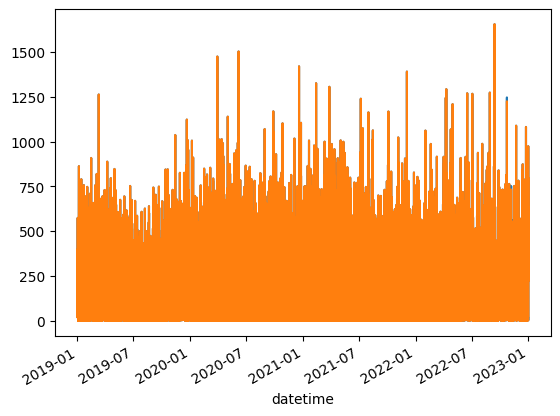

In [28]:
new_df["Energia Up"].plot()
dataset[dataset.index.year.isin([2019, 2020, 2021, 2022])]["UpwardUsedSecondaryReserveEnergy"].plot()

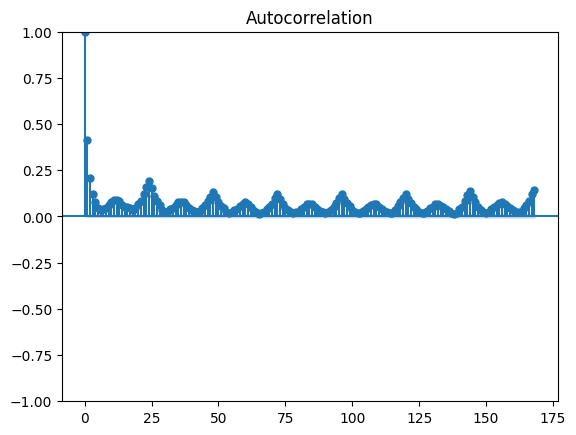

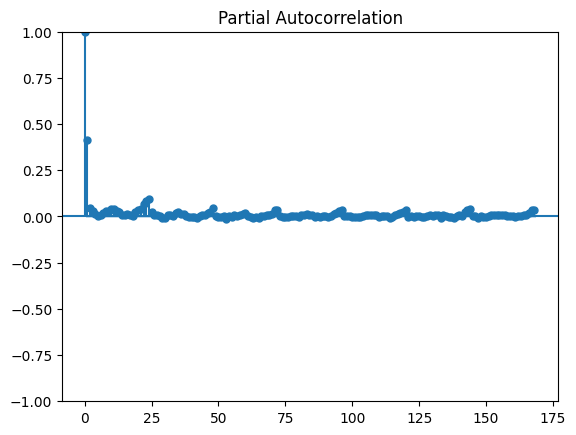

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate ACF plot to determine q for MA
plot_acf(df_imputed['UpwardUsedSecondaryReserveEnergy'], lags=168)
plt.show()

# Generate PACF plot to determine p for AR
plot_pacf(df_imputed['UpwardUsedSecondaryReserveEnergy'], lags=168)
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_imputed['UpwardUsedSecondaryReserveEnergy'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -22.273727
p-value: 0.000000


In [4]:
# Stationary

In [5]:
P=24
Q=24

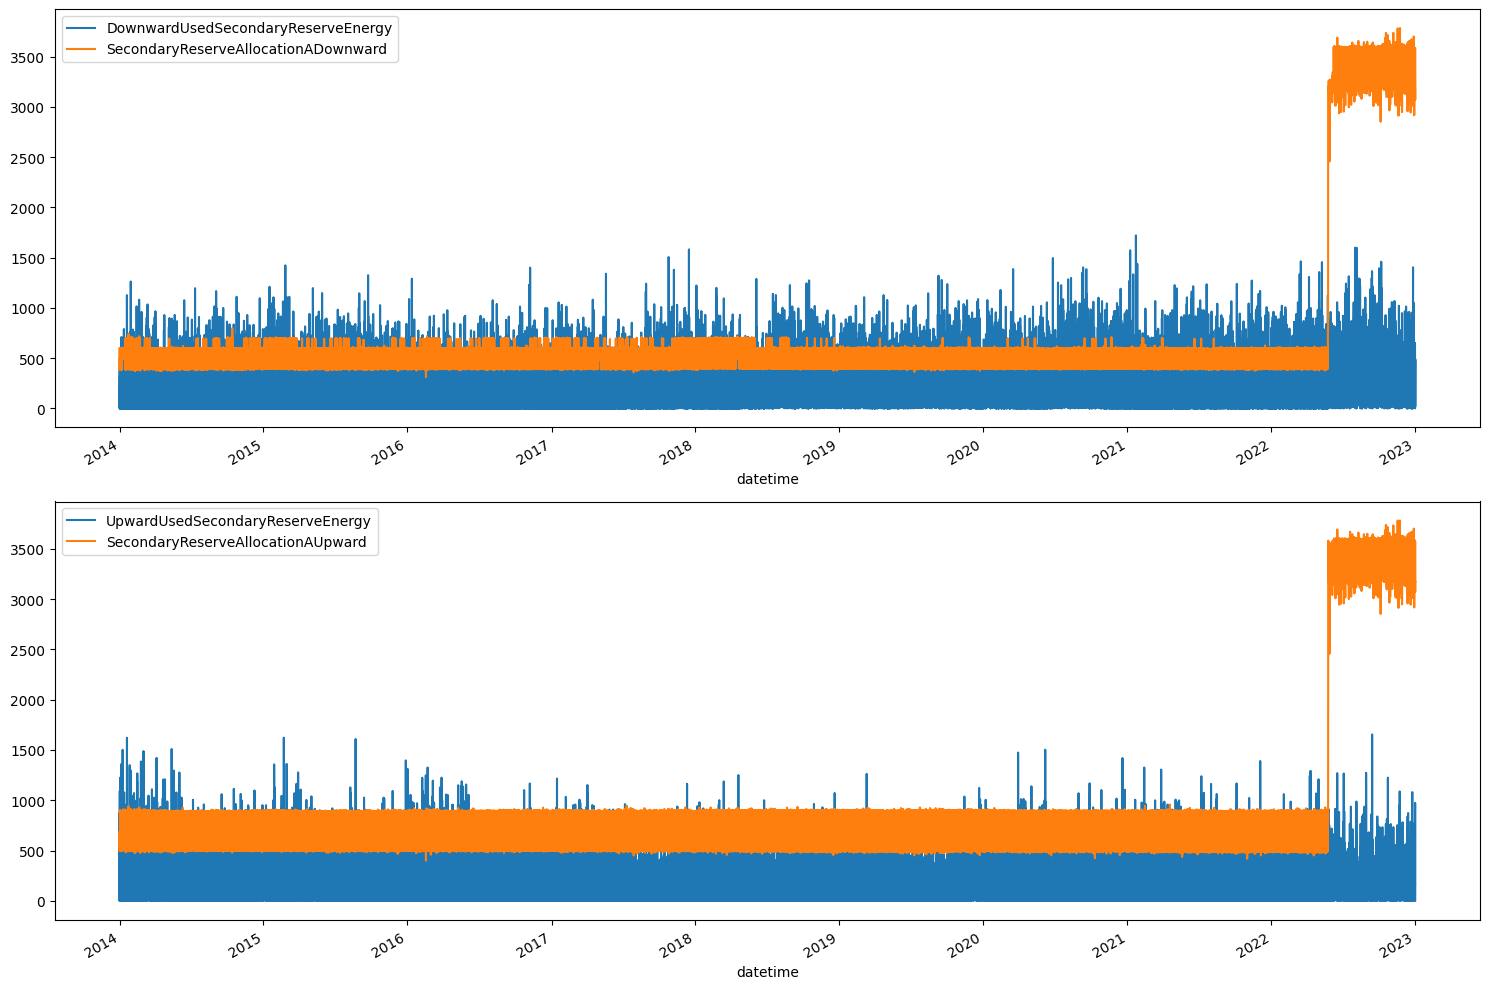

In [6]:
# Benchmark
columns_Y = ["DownwardUsedSecondaryReserveEnergy", "UpwardUsedSecondaryReserveEnergy"]
alloc_column = ["SecondaryReserveAllocationADownward", "SecondaryReserveAllocationAUpward"]

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs = axs.flatten()


for ax, y, a in zip(axs, columns_Y, alloc_column):
    original_dataset[[y,a]].plot(ax=ax)

plt.tight_layout()  # Increase padding
plt.savefig(f'../plots/benchmark.png')




In [3]:
predict_score = prediction_score(original_dataset['UpwardUsedSecondaryReserveEnergy'], original_dataset['SecondaryReserveAllocationAUpward'], original_dataset['SecondaryReserveAllocationAUpward'], "benchmark")


In [4]:
predict_score

{'name': 'benchmark',
 'rmse': 963.1909591866699,
 'abs erro': 53254091.2,
 'r2 score': -26.147637046658637,
 'mape score': 90.44161200506936,
 'alloc missing': 430902.00000000006,
 'alloc surplus': 52823189.2,
 'optimal percentage': 96.35427890526957,
 'beter percentage': 100.0,
 'bscore m': -1.9258346126868877,
 'bscore s': -0.745542775148559,
 'bscore': -2.671377387835447}

In [9]:
predict_score = {k:v for k,v in predict_score.items() if not "percentage" in k }
predict_score = {k:v for k,v in predict_score.items() if not "better" in k }
predict_score = {k:[v] for k,v in predict_score.items() if not "name" in k }

In [10]:
pd.DataFrame(predict_score).to_csv('../data/benchmark_scores.csv' ,index=False)

In [5]:
year_mask = df_imputed.index.year==2019
year_mask = year_mask | (df_imputed.index.year==2020)

year_mask = year_mask | (df_imputed.index.year==2021)

year_mask = year_mask | (df_imputed.index.year==2022)

mask_last_week_2020 = df_imputed.index.year==2018
week_hours_plus_day = (24*7)
# Get the indices of the True values in mask_last_week_2020
true_indices = np.where(mask_last_week_2020)[0]

# Get the last week_hours_plus_day of these indices
last_indices = true_indices[-week_hours_plus_day:]

# Create a new array of the same size as mask_last_week_2020
new_mask = np.zeros_like(mask_last_week_2020, dtype=bool)

# Set the values at the last_indices to True
new_mask[last_indices] = True


mask_data = new_mask | year_mask

test = df_imputed[mask_data]

In [6]:
# Split data into train and test
train = df_imputed
#test = df_imputed[df_imputed.index.year == 2021]

model_folder = "/home/joao/Documentos/repos/renewable-generation-into-reserve-markets/statistical_models"

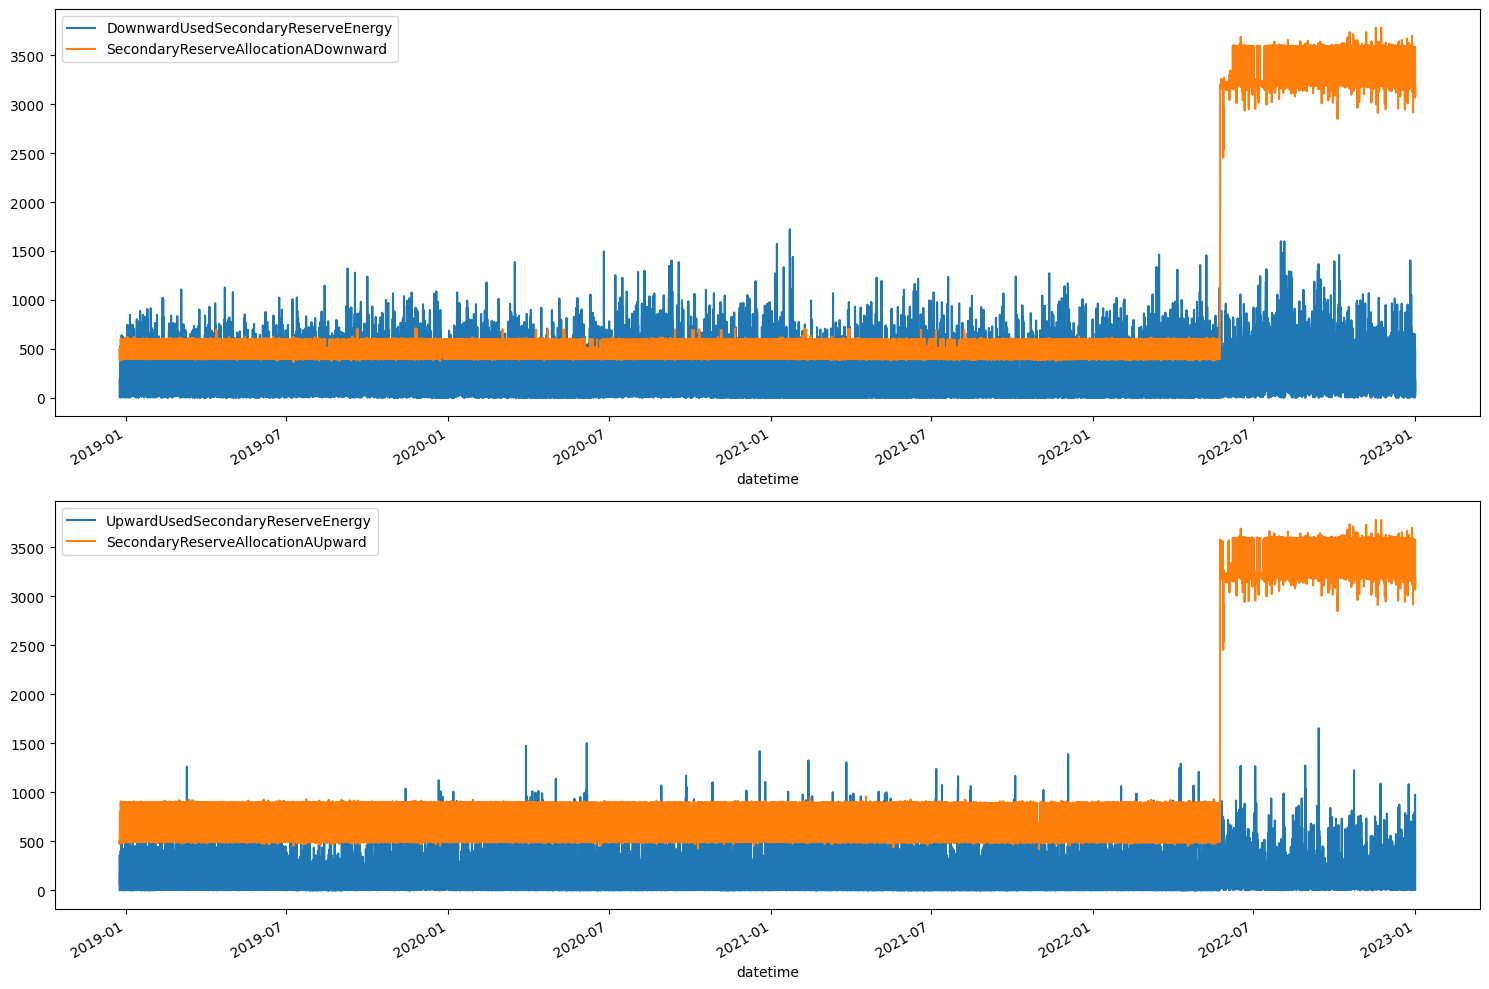

In [7]:
# Benchmark
columns_Y = ["DownwardUsedSecondaryReserveEnergy", "UpwardUsedSecondaryReserveEnergy"]
alloc_column = ["SecondaryReserveAllocationADownward", "SecondaryReserveAllocationAUpward"]

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs = axs.flatten()


for ax, y, a in zip(axs, columns_Y, alloc_column):
    test[[y,a]].plot(ax=ax)

plt.tight_layout()  # Increase padding
plt.savefig(f'../plots/benchmark_validation.png')




In [14]:
test[test.index.year>2018]

,DownwardUsedSecondaryReserveEnergy,UpwardUsedSecondaryReserveEnergy,BaseDailyOperatingSchedulePBFSolarPV,BaseDailyOperatingSchedulePBFWind,BaseDailyOperatingShedulePBFTotalBalanceInterconnections,DemandD+1DailyForecast,PhotovoltaicD+1DailyForecast,SecondaryReserveAllocationADownward,SecondaryReserveAllocationAUpward,TotalBaseDailyOperatingSchedulePBFGeneration,WindD+1DailyForecast
datetime,,,,,,,,,,,
2019-01-01 00:00:00+00:00,83.7,116.9,7.1,4459.6,1837.5,23018.0,0.0,499.0,597.0,19452.0,3222.0
2019-01-01 01:00:00+00:00,11.6,348.1,7.1,4326.8,1524.9,21808.0,0.0,499.0,599.0,18447.7,3081.0
2019-01-01 02:00:00+00:00,15.3,286.9,7.1,4213.9,1336.4,20635.0,0.0,499.0,598.0,17458.3,3069.0
2019-01-01 03:00:00+00:00,36.6,398.4,7.1,4059.7,1158.3,19824.0,0.0,499.0,599.0,17142.8,2973.0
2019-01-01 04:00:00+00:00,22.4,280.9,7.1,3921.6,1114.3,19544.0,0.0,398.0,500.0,17187.4,2904.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00+00:00,113.2,374.4,58.5,11529.9,579.2,26203.0,0.0,3184.0,3188.0,26319.6,10615.5
2022-12-31 19:00:00+00:00,186.4,816.6,8.6,11457.4,483.6,25256.5,0.0,3176.0,3180.0,25953.0,10477.8
2022-12-31 20:00:00+00:00,35.0,673.5,7.2,9346.3,3398.3,24142.3,0.0,3180.0,3180.0,21834.7,10446.8


In [15]:
predict_score = prediction_score(test[test.index.year>2018]['UpwardUsedSecondaryReserveEnergy'], test[test.index.year>2018]['SecondaryReserveAllocationAUpward'], test[test.index.year>2018]['SecondaryReserveAllocationAUpward'], "benchmark validation")
predict_score = {k:v for k,v in predict_score.items() if not "percentage" in k }
predict_score = {k:v for k,v in predict_score.items() if not "better" in k }
predict_score = {k:[v] for k,v in predict_score.items() if not "name" in k }

In [16]:
predict_score

{'rmse': [1296.1782041697836],
 'abs erro': [30325650.4],
 'r2 score': [-56.55316896320465],
 'mape score': [77.8731579190755],
 'alloc missing': [146915.2],
 'alloc surplus': [30178735.2],
 'bscore m': [0.002442371374891326],
 'bscore s': [0.0027434164940291234],
 'bscore': [0.005185787868920449]}

In [10]:
test

,DownwardUsedSecondaryReserveEnergy,UpwardUsedSecondaryReserveEnergy,BaseDailyOperatingSchedulePBFSolarPV,BaseDailyOperatingSchedulePBFWind,BaseDailyOperatingShedulePBFTotalBalanceInterconnections,DemandD+1DailyForecast,PhotovoltaicD+1DailyForecast,SecondaryReserveAllocationADownward,SecondaryReserveAllocationAUpward,TotalBaseDailyOperatingSchedulePBFGeneration,WindD+1DailyForecast
datetime,,,,,,,,,,,
2018-12-25 00:00:00+00:00,185.0,4.3,7.1,2192.3,2541.8,21735.203998,32.226450,498.0,498.0,18345.1,1481.615693
2018-12-25 01:00:00+00:00,19.2,202.1,7.1,2193.4,2375.5,20061.295401,30.514788,499.0,499.0,17062.5,1426.530888
2018-12-25 02:00:00+00:00,32.2,251.6,7.1,2137.5,2367.1,18982.432066,27.035341,378.0,473.0,16083.6,1314.788945
2018-12-25 03:00:00+00:00,128.7,38.7,7.1,2120.5,2055.1,18409.374562,20.493870,412.0,515.0,15777.9,1320.963778
2018-12-25 04:00:00+00:00,12.6,359.3,7.1,2096.0,1925.0,18108.477523,30.890048,379.0,475.0,15753.1,1264.198003
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00+00:00,113.2,374.4,58.5,11529.9,579.2,26203.000000,0.000000,3184.0,3188.0,26319.6,10615.500000
2022-12-31 19:00:00+00:00,186.4,816.6,8.6,11457.4,483.6,25256.500000,0.000000,3176.0,3180.0,25953.0,10477.800000
2022-12-31 20:00:00+00:00,35.0,673.5,7.2,9346.3,3398.3,24142.300000,0.000000,3180.0,3180.0,21834.7,10446.800000


In [53]:
pd.DataFrame(predict_score).to_csv('../data/benchmark_validation_scores.csv' ,index=False)

In [17]:


# Function to create, fit, predict and plot a model
def create_fit_predict_plot_model(model, train, test, model_name):
    model_fit = model.fit()
    predictions = model_fit.predict(start=test.index[0], end=test.index[-1])

    model_test_filename = os.path.join(model_folder, f"{model_name}_test.npz")
    model_score_filename = os.path.join(model_folder, f"{model_name}_score.json")



    predict_score = prediction_score(test['UpwardUsedSecondaryReserveEnergy'], predictions, test['SecondaryReserveAllocationAUpward'], model_name)
    save_scores(test['UpwardUsedSecondaryReserveEnergy'], predictions, test['SecondaryReserveAllocationAUpward'], 
                model_test_filename, predict_score, model_score_filename)

    
    fig, ax = plt.subplots()
    #ax.plot(train.index, train['UpwardUsedSecondaryReserveEnergy'], label='Train')
    ax.plot(test.index, test['UpwardUsedSecondaryReserveEnergy'], label='Test')
    ax.plot(predictions.index, predictions, label=model_name)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.title(f'{model_name} Model')
    plt.legend()
    plt.savefig(f'../plots/{model_name}_model.png')


/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/Documentos/repos/renewable-generation-into-reserve-markets/scripts/predictions_scores.py:15: RuntimeWarning: Mean of empty slice
  mape = np.nanmean(np.abs(percentage_error))
/home/joao/Documentos/repos/renewable-generation-into-reserve-markets/scripts/predictions_scores.py:17: RuntimeWarning: Mean of empty slice
  mse= np.nanmean(np.square(erro))


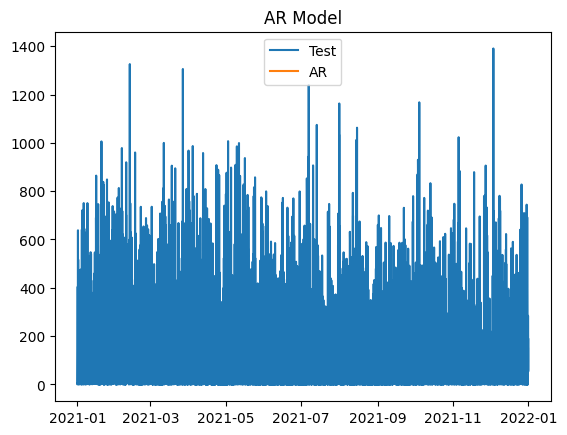

In [12]:

# Create AR model
model_ar = AutoReg(train['UpwardUsedSecondaryReserveEnergy'], lags=P)
create_fit_predict_plot_model(model_ar, train, test, 'AR')



/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

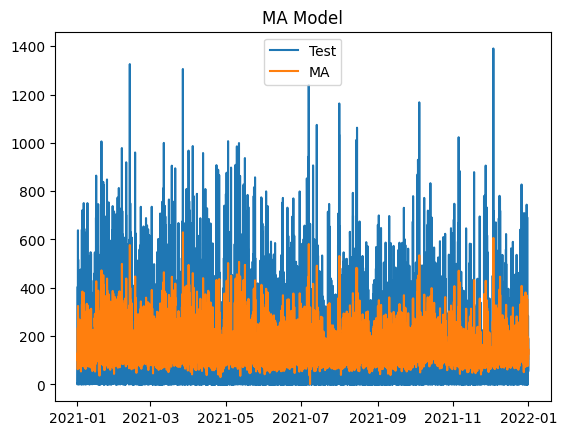

In [13]:
# Create MA model
model_ma = ARIMA(train['UpwardUsedSecondaryReserveEnergy'], order=(0,0,Q))
create_fit_predict_plot_model(model_ma, train, test, 'MA')


/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

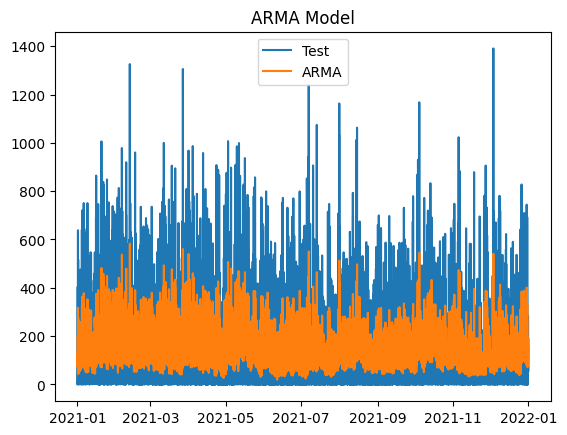

In [14]:

# Create ARMA model
model_arma = ARIMA(train['UpwardUsedSecondaryReserveEnergy'], order=(P,0,Q))
create_fit_predict_plot_model(model_arma, train, test, 'ARMA')


/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

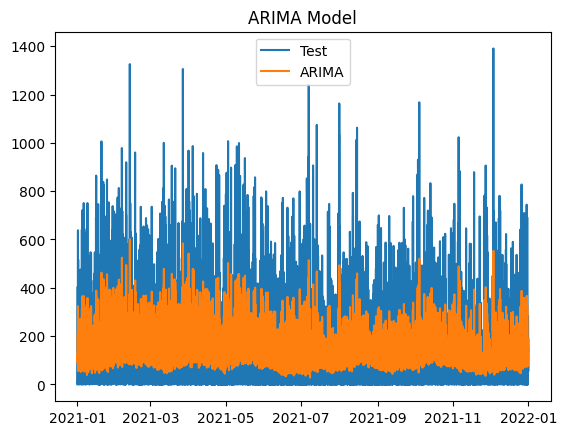

In [18]:

# Create ARIMA model
model_arima = ARIMA(train['UpwardUsedSecondaryReserveEnergy'], order=(P,1,Q))
create_fit_predict_plot_model(model_arima, train, test, 'ARIMA')


/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73712D+00    |proj g|=  7.25064D-02


 This problem is unconstrained.



At iterate    5    f=  6.67455D+00    |proj g|=  2.74217D-02

At iterate   10    f=  6.66335D+00    |proj g|=  2.36600D-03

At iterate   15    f=  6.62309D+00    |proj g|=  5.45323D-02

At iterate   20    f=  6.62216D+00    |proj g|=  6.38382D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24    121      3     0     0   4.013D-02   6.622D+00
  F =   6.6219717941745868     

ABNORMAL_TERMINATION_IN_LNSRCH                              


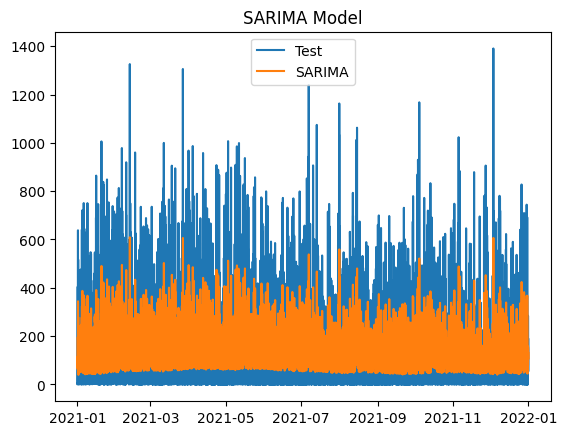

In [19]:

# Create SARIMA model
model_sarima = sm.tsa.statespace.SARIMAX(train['UpwardUsedSecondaryReserveEnergy'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
create_fit_predict_plot_model(model_sarima, train, test, 'SARIMA')

/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


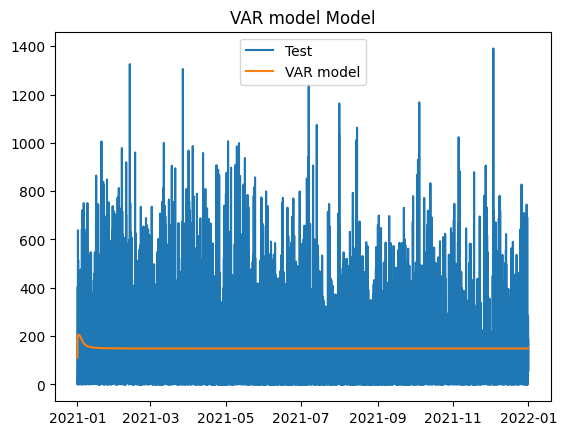

In [20]:
from statsmodels.tsa.vector_ar.var_model import VAR


# Fit VAR model
model = VAR(train)
model_fit = model.fit()
model_name = "VAR model"

# Make prediction
prediction = model_fit.forecast(model_fit.endog, steps=len(test))
# Convert prediction to dataframe
predictions = pd.DataFrame(prediction, index=test.index, columns=test.columns)

model_test_filename = os.path.join(model_folder, f"{model_name}_test.npz")
model_score_filename = os.path.join(model_folder, f"{model_name}_score.json")


predict_score = prediction_score(test['UpwardUsedSecondaryReserveEnergy'], predictions['UpwardUsedSecondaryReserveEnergy'], test['SecondaryReserveAllocationAUpward'], model_name)
save_scores(test['UpwardUsedSecondaryReserveEnergy'], prediction, test['SecondaryReserveAllocationAUpward'], 
            model_test_filename, predict_score, model_score_filename)





fig, ax = plt.subplots()
#ax.plot(train.index, train['UpwardUsedSecondaryReserveEnergy'], label='Train')
ax.plot(test.index, test['UpwardUsedSecondaryReserveEnergy'], label='Test')
ax.plot(predictions.index, predictions['UpwardUsedSecondaryReserveEnergy'], label=model_name)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title(f'{model_name} Model')
plt.legend()
plt.savefig(f'../plots/{model_name}_model.png')


In [21]:
import json

json_stats = [os.path.join(model_folder,f) for f in os.listdir(model_folder) if "json" in f]

result_dict = {}
results_list = []
for j in json_stats:
    with open(j) as file:
        dic = json.load(file)
    results_list.append(dic)
    for key in dic:
        val = dic[key]
        if not isinstance(val, list):
            val =[val]
        if key not in result_dict:
            result_dict[key]= val
        else:
            result_dict[key]+=val

#res_df = pd.DataFrame(result_dict)
res_df = pd.DataFrame(results_list)
    


In [24]:
res_df.set_index("name").T[["AR","MA","ARMA", "ARIMA","SARIMA", 
                          "VAR model"]].T

,rmse,abs erro,erro comp,r2 score,mape score,alloc missing,alloc surplus,optimal percentage,better allocation,beter percentage
name,,,,,,,,,,
AR,NaN,0.0,True,-0.646446,NaN,NaN,NaN,0.0,0.0,0.0
MA,171.143037,1123214.128971,True,0.139905,17.03786,560507.019008,562707.109963,63.789954,63.789954,86.8379
ARMA,169.985683,1108555.941522,True,0.151499,16.363191,554443.338885,554112.602638,64.041096,64.041096,87.16895
ARIMA,170.126371,1111215.122034,True,0.150093,16.519114,556281.621322,554933.500713,64.02968,64.02968,87.009132
SARIMA,171.8775,1115725.359856,True,0.132507,16.433183,568538.034633,547187.325223,63.447489,63.447489,86.917808
VAR model,184.600552,1253196.024737,True,-0.000677,21.62921,619929.792852,633266.231884,64.817352,64.817352,86.073059


In [28]:
res_df.set_index("name").T[["AR","MA","ARMA", "ARIMA","SARIMA", 
                          "VAR model"]].T.to_csv('../statistical_models/stats_scores.csv' ,index=False)
res_df.set_index("name").T[["AR","MA","ARMA", "ARIMA","SARIMA", 
                          "VAR model"]].T.to_latex("../statistical_models/stats_scores.tex", escape=False,index=False, float_format="%.2f")
